In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_table("Spotify_final_dataset.csv",sep=",")
data.head()

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,(x29),2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,(x20),2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,(x4),1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,(x124),2905678,718865961


### Data preprocess

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Position                11084 non-null  int64  
 1   Artist Name             11084 non-null  object 
 2   Song Name               11080 non-null  object 
 3   Days                    11084 non-null  int64  
 4   Top 10 (xTimes)         11084 non-null  float64
 5   Peak Position           11084 non-null  int64  
 6   Peak Position (xTimes)  11084 non-null  object 
 7   Peak Streams            11084 non-null  int64  
 8   Total Streams           11084 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 779.5+ KB


Peak position (Xtimes columns is object instead of numerical)

In [4]:
data.iloc[:,6] = pd.to_numeric(data.iloc[:,6].str.extract(r'(\d+)', expand=False))


### checking for null values

In [5]:
null_rows = data[data.isnull().any(axis=1)]
null_rows

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
5506,5507,Jenny Duncan,NaN,1,1.0,10,0,1737605,1737605
6217,6218,Dj Ozuna,NaN,6,0.0,122,0,231840,1198268
7177,7178,Daniel Marcy,NaN,1,0.0,20,0,710534,710534
8215,8216,Amy Kaylee,NaN,2,0.0,125,0,213438,412133


Lets check if Artists have more than 1 hit song. If not, we can replace the name of song with artist name

In [6]:
for i in null_rows["Artist Name"]:
    count = (data["Artist Name"] == i).sum()
    if count > 1:
        print(f"{i} has occured {count}times.")
    else:
        print(f"{i}had occured only once")

Jenny Duncan had occured only once
Dj Ozuna had occured only once
Daniel Marcy had occured only once
Amy Kaylee had occured only once


In [7]:
data["Song Name"] = data["Song Name"].fillna(data["Artist Name"])
data.head()

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,29,2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,20,2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,4,1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,124,2905678,718865961


### Exploratory Data Analysis

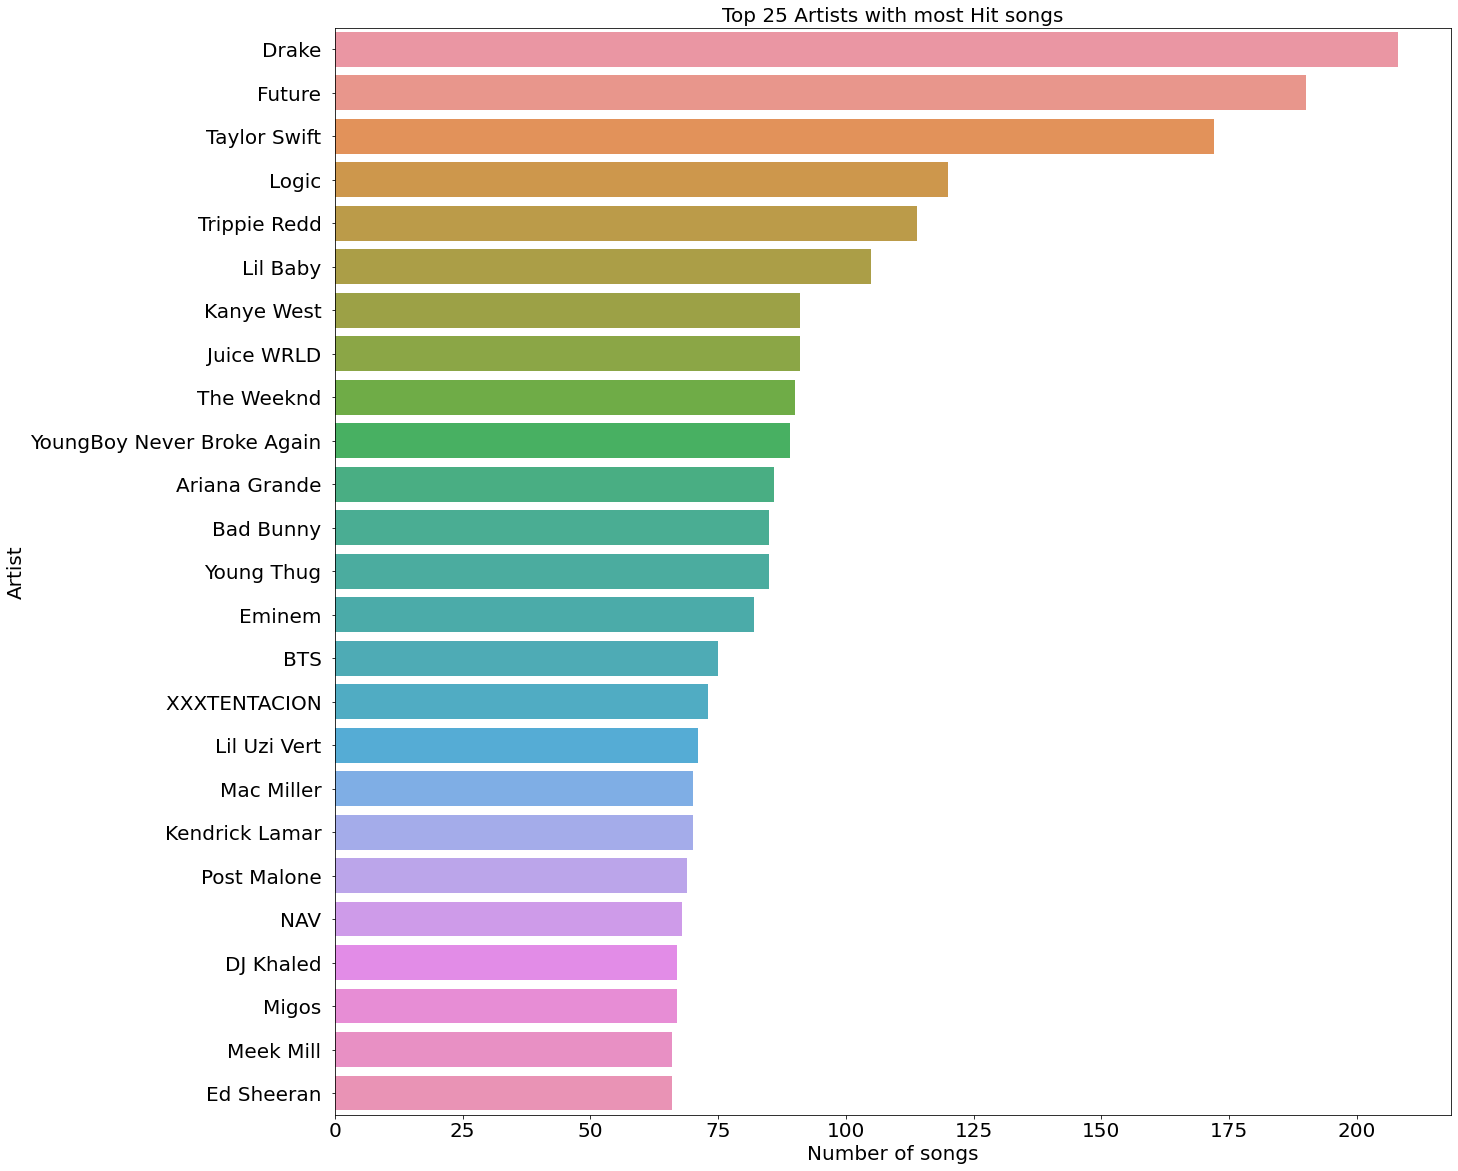

In [8]:
plt.figure(figsize=(20,20))
artist_counts = data.groupby('Artist Name').size().sort_values(ascending=False)
top_artists = artist_counts.nlargest(25)
sns.barplot(y=top_artists.index, x=top_artists.values)
plt.title("Top 25 Artists with most Hit songs", size=20)
plt.ylabel("Artist", size=20)
plt.xlabel("Number of songs", size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Drake,future and Taylor swift are the Top 3 artists that have the most hit songs


Highest peaks that songs reached .What peak has highest values

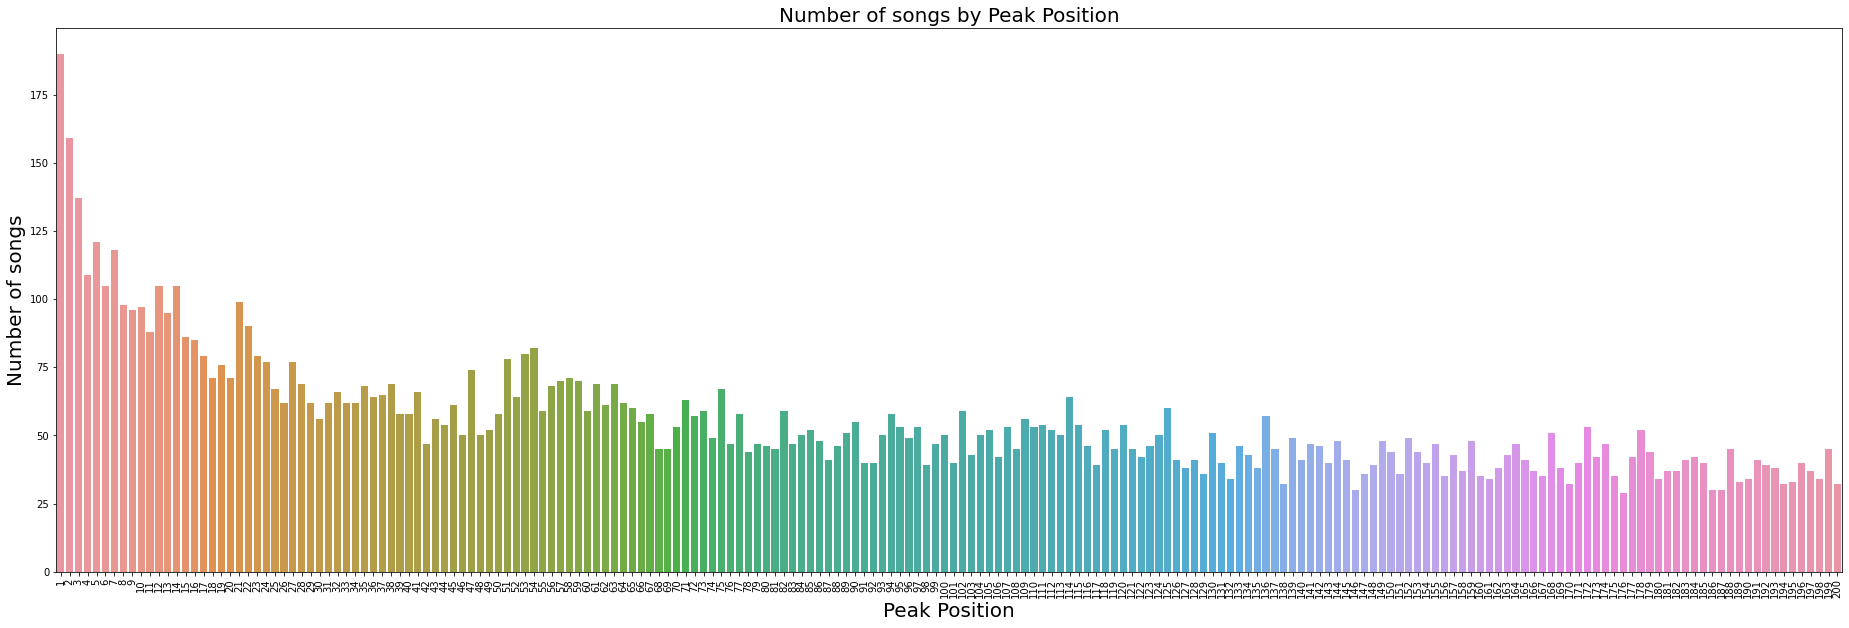

In [9]:
plt.figure(figsize=(32,10))
peak_position_counts = data.groupby("Peak Position").size()
sns.barplot(x=peak_position_counts.index,y=peak_position_counts.values)
plt.title("Number of songs by Peak Position", size=20)
plt.xlabel("Peak Position", size=20)
plt.ylabel("Number of songs", size=20)
plt.xticks(rotation=90)
plt.show()

Lets see the songs in given dataset that have been in Top 10 the most number of times

In [10]:
top_10_songs = data.nlargest(10, 'Peak Position (xTimes)')
top_10_songs[['Artist Name', 'Song Name', 'Peak Position', 'Peak Position (xTimes)']]

,Artist Name,Song Name,Peak Position,Peak Position (xTimes)
4,Post Malone,rockstar,1,124
22,Drake,One Dance,1,103
18,Roddy Ricch,The Box,1,85
17,Drake,God's Plan,1,70
36,The Chainsmokers,Closer,1,70
10,Kendrick Lamar,HUMBLE.,1,67
139,Steve Lacy,Bad Habit,1,66
44,DaBaby,ROCKSTAR,1,65
79,Cardi B,WAP,1,64
194,Rihanna,Work,1,62


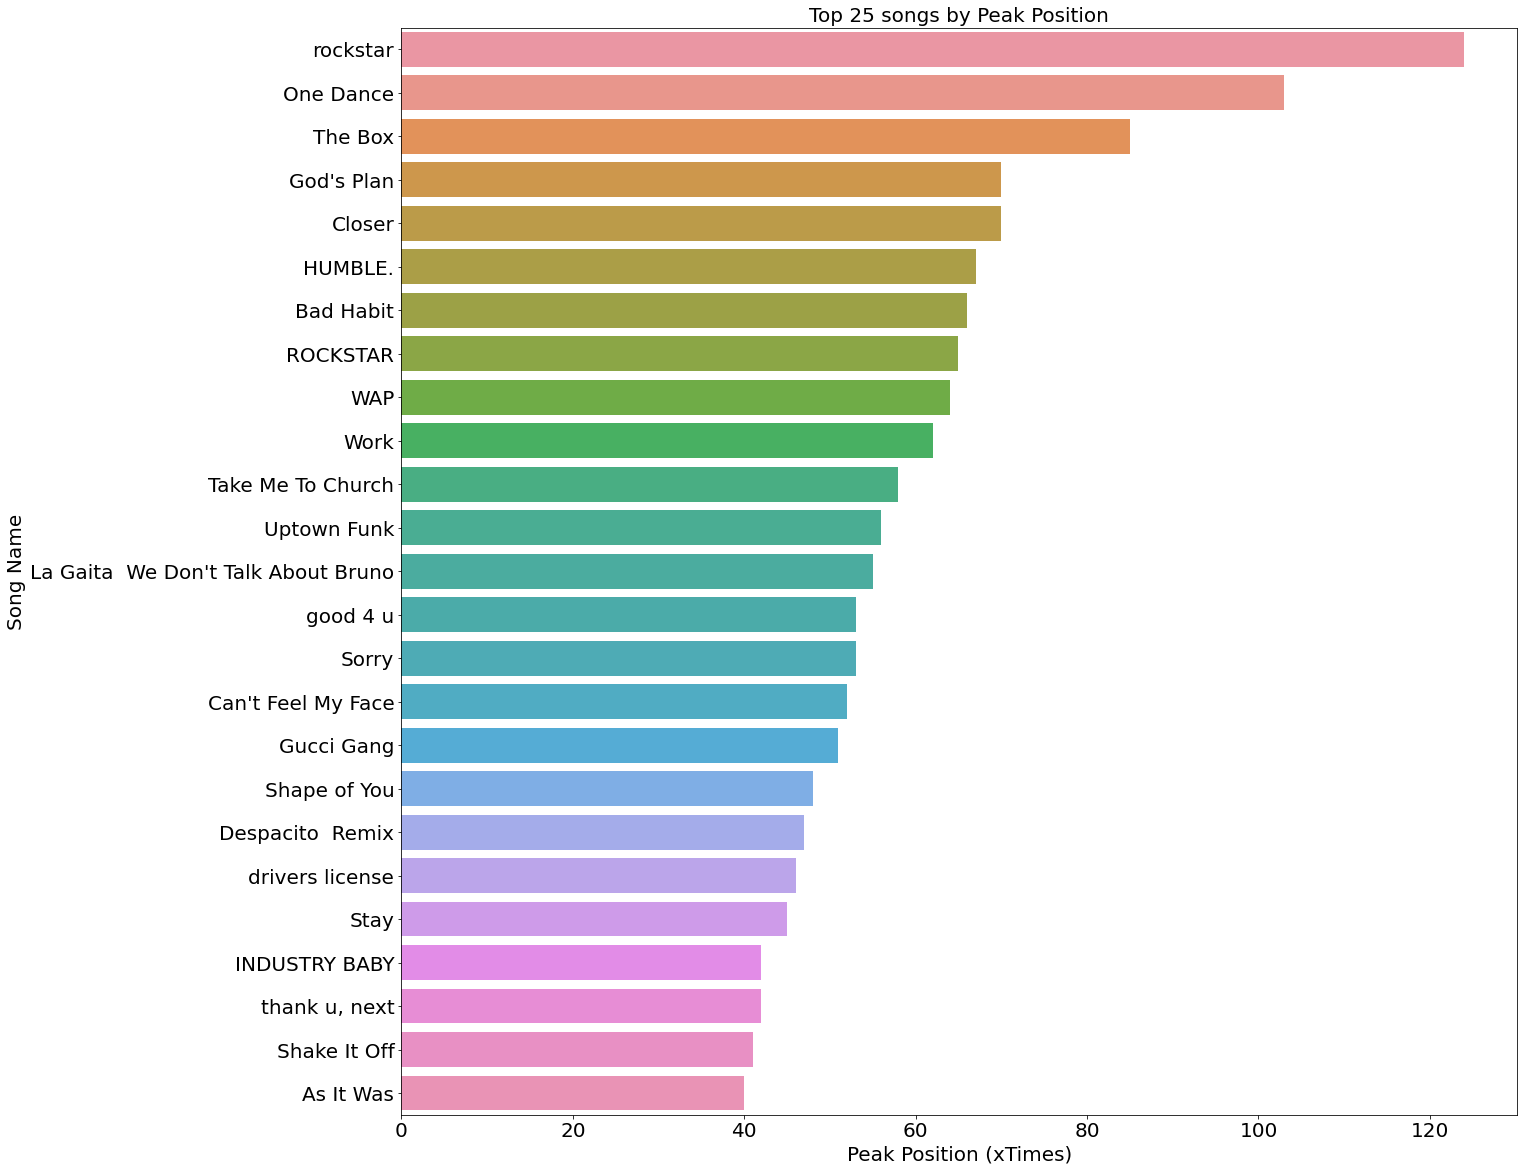

In [11]:
plt.figure(figsize=(20,20))
top_songs = data.sort_values(by="Peak Position (xTimes)",ascending=False).head(25)
top_songs = top_songs[['Song Name', 'Peak Position (xTimes)']]
sns.barplot(y='Song Name', x='Peak Position (xTimes)', data=top_songs)
plt.title("Top 25 songs by Peak Position", size=20)
plt.ylabel("Song Name", size=20)
plt.xlabel('Peak Position (xTimes)', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


Visualizing the distribution of streams using a histogram

Lets see the songs in given dataset that have been in top 10 list the most number of times

In [13]:
top_10_songs = data.nlargest(10, 'Top 10 (xTimes)')
top_10_songs[['Artist Name', 'Song Name', 'Top 10 (xTimes)']]

,Artist Name,Song Name,Top 10 (xTimes)
0,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,302.0
29,The Kid LAROI,Stay,271.0
45,Lil Nas X,INDUSTRY BABY,267.0
16,Glass Animals,Heat Waves,248.0
6,The Weeknd,Blinding Lights,233.0
2,Lil Uzi Vert,XO TOUR Llif3,212.0
51,Harry Styles,As It Was,203.0
18,Roddy Ricch,The Box,197.0
38,The Weeknd,The Hills,194.0
12,Travis Scott,SICKO MODE,190.0


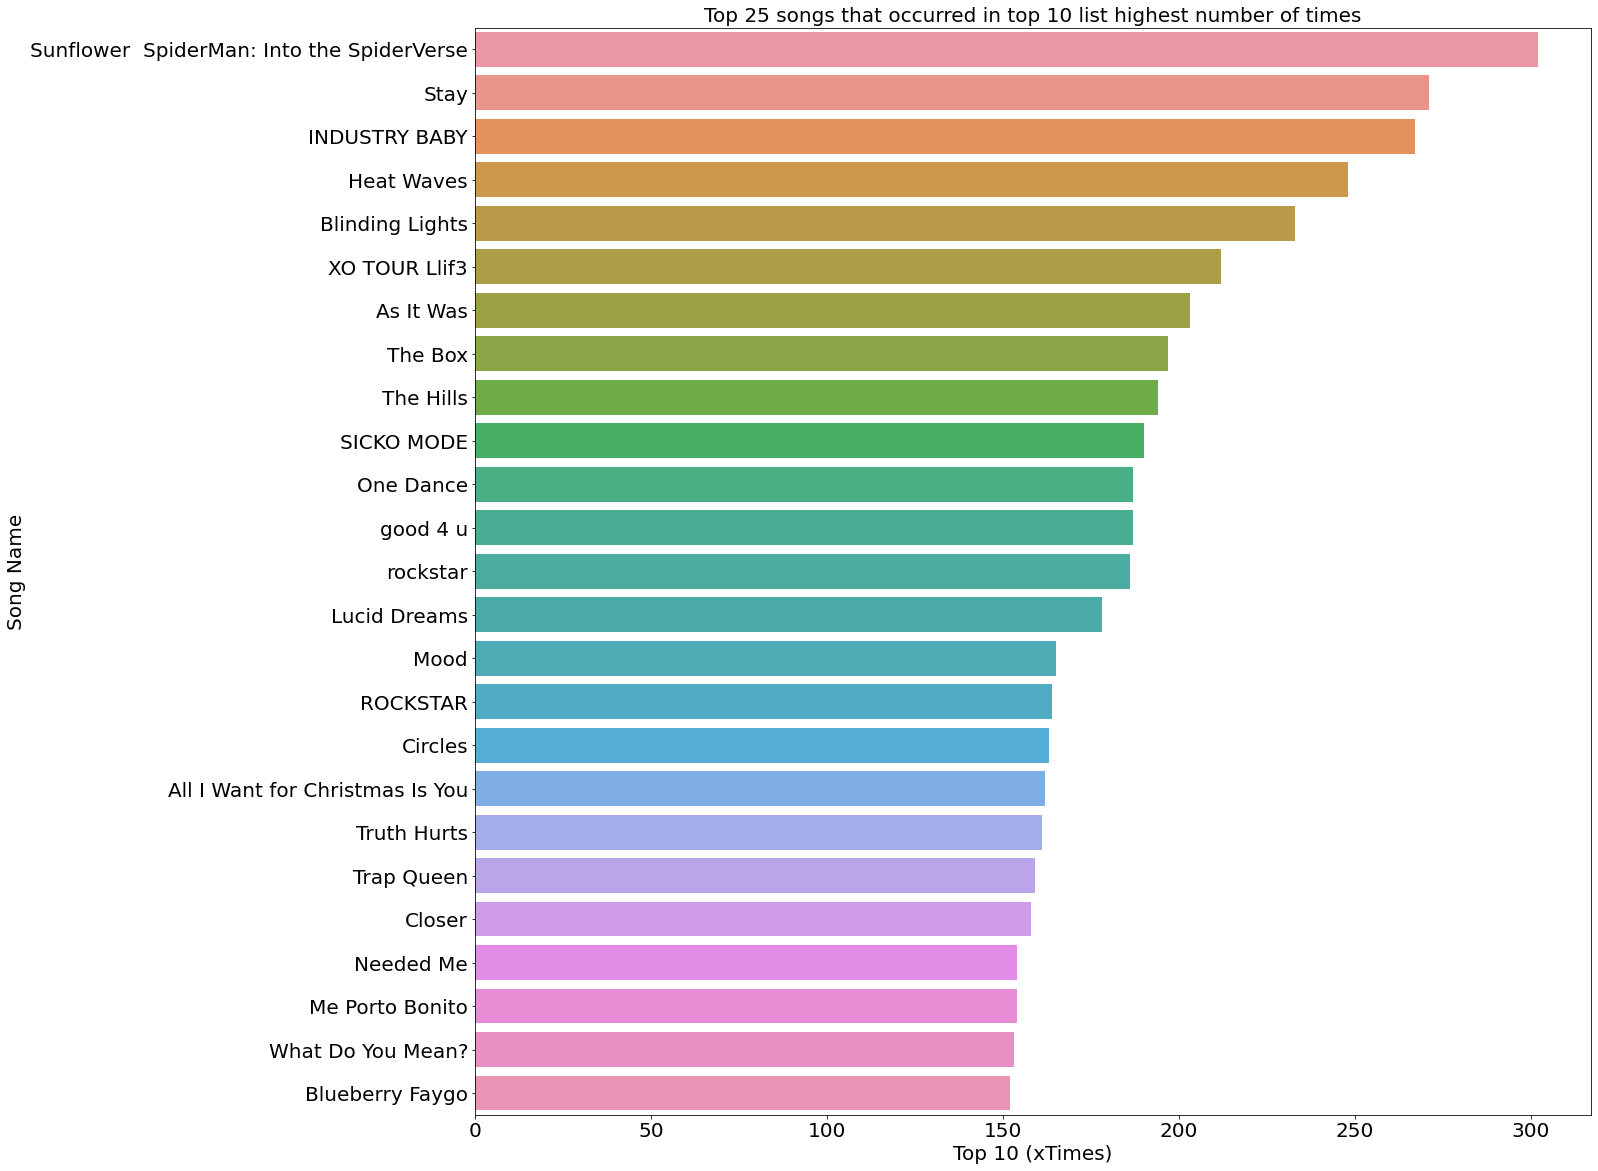

In [15]:
plt.figure(figsize=(20,20))
top_songs = data.sort_values(by='Top 10 (xTimes)', ascending=False).head(25)
top_songs = top_songs[['Song Name', 'Top 10 (xTimes)']]
sns.barplot(y='Song Name',x='Top 10 (xTimes)', data=top_songs)
plt.title("Top 25 songs that occurred in top 10 list highest number of times", size=20)
plt.ylabel("Song Name", size=20)
plt.xlabel('Top 10 (xTimes)', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Visualizing the distribution of streams using a histogram

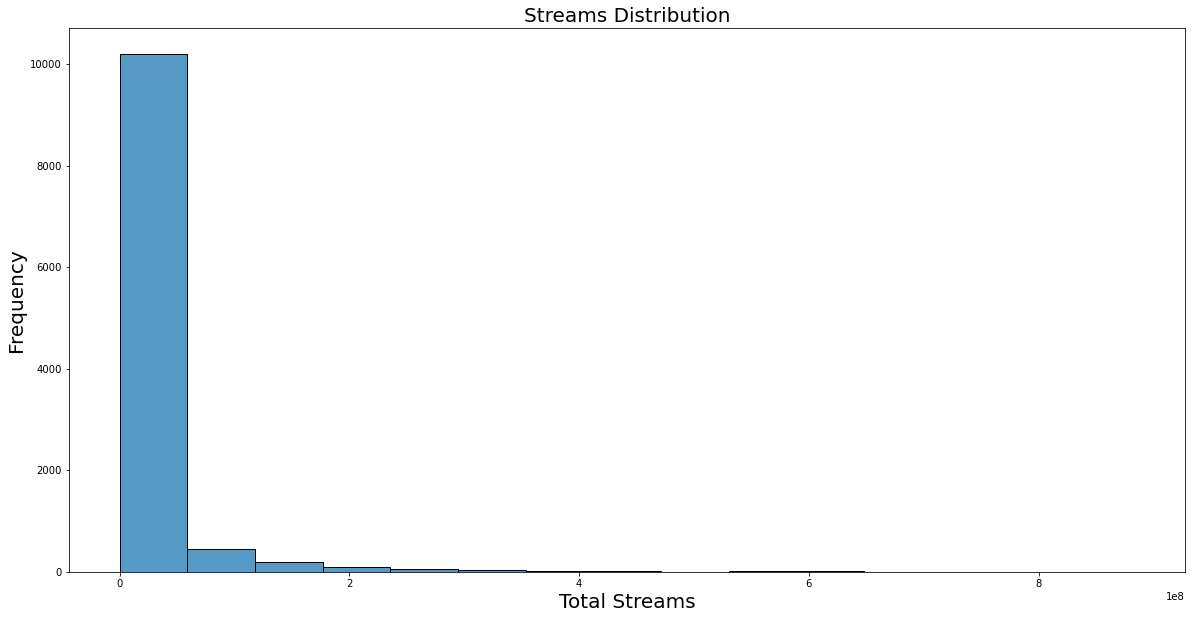

In [16]:
plt.figure(figsize=(20,10))
sns.histplot(data=data,x="Total Streams",bins=15)
plt.title("Streams Distribution", size=20)
plt.xlabel("Total Streams", size=20)
plt.ylabel("Frequency", size=20)
plt.show()


This is an extreme case of pareto. We can say that most of songs are played less than 50 million times.

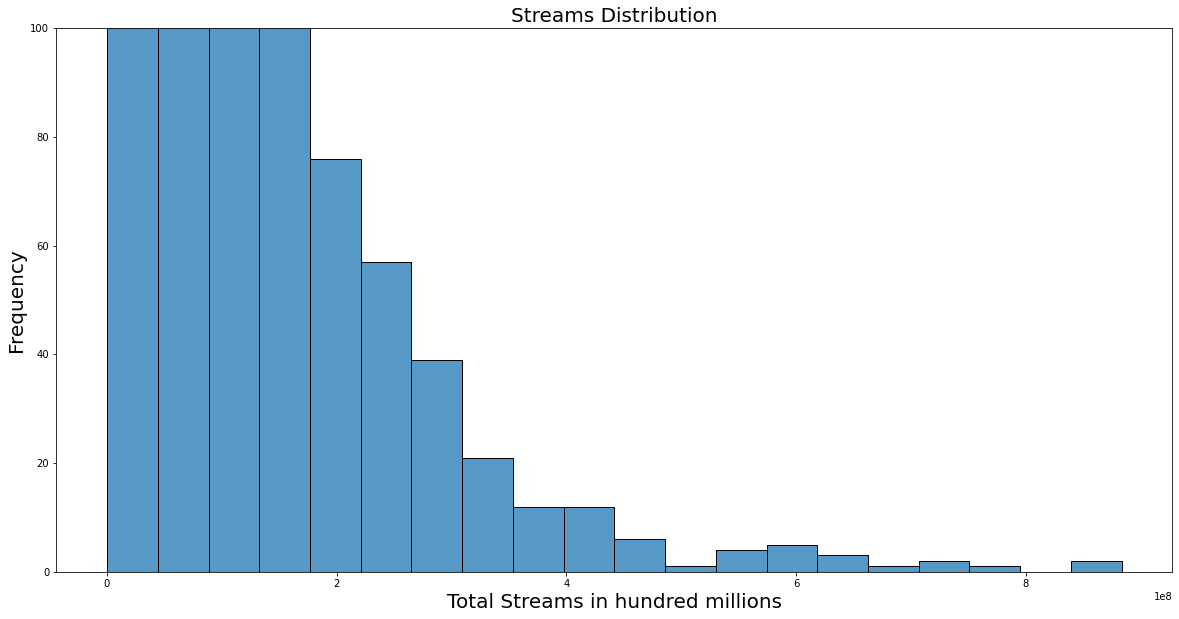

In [17]:
plt.figure(figsize=(20,10))
sns.histplot(data=data, x='Total Streams', bins=20)
plt.title("Streams Distribution", size=20)
plt.xlabel("Total Streams in hundred millions", size=20)
plt.ylim(0,100)
plt.ylabel("Frequency", size=20)
plt.show()

There are few songs that are played almost a billion times. Let's see what are these songs

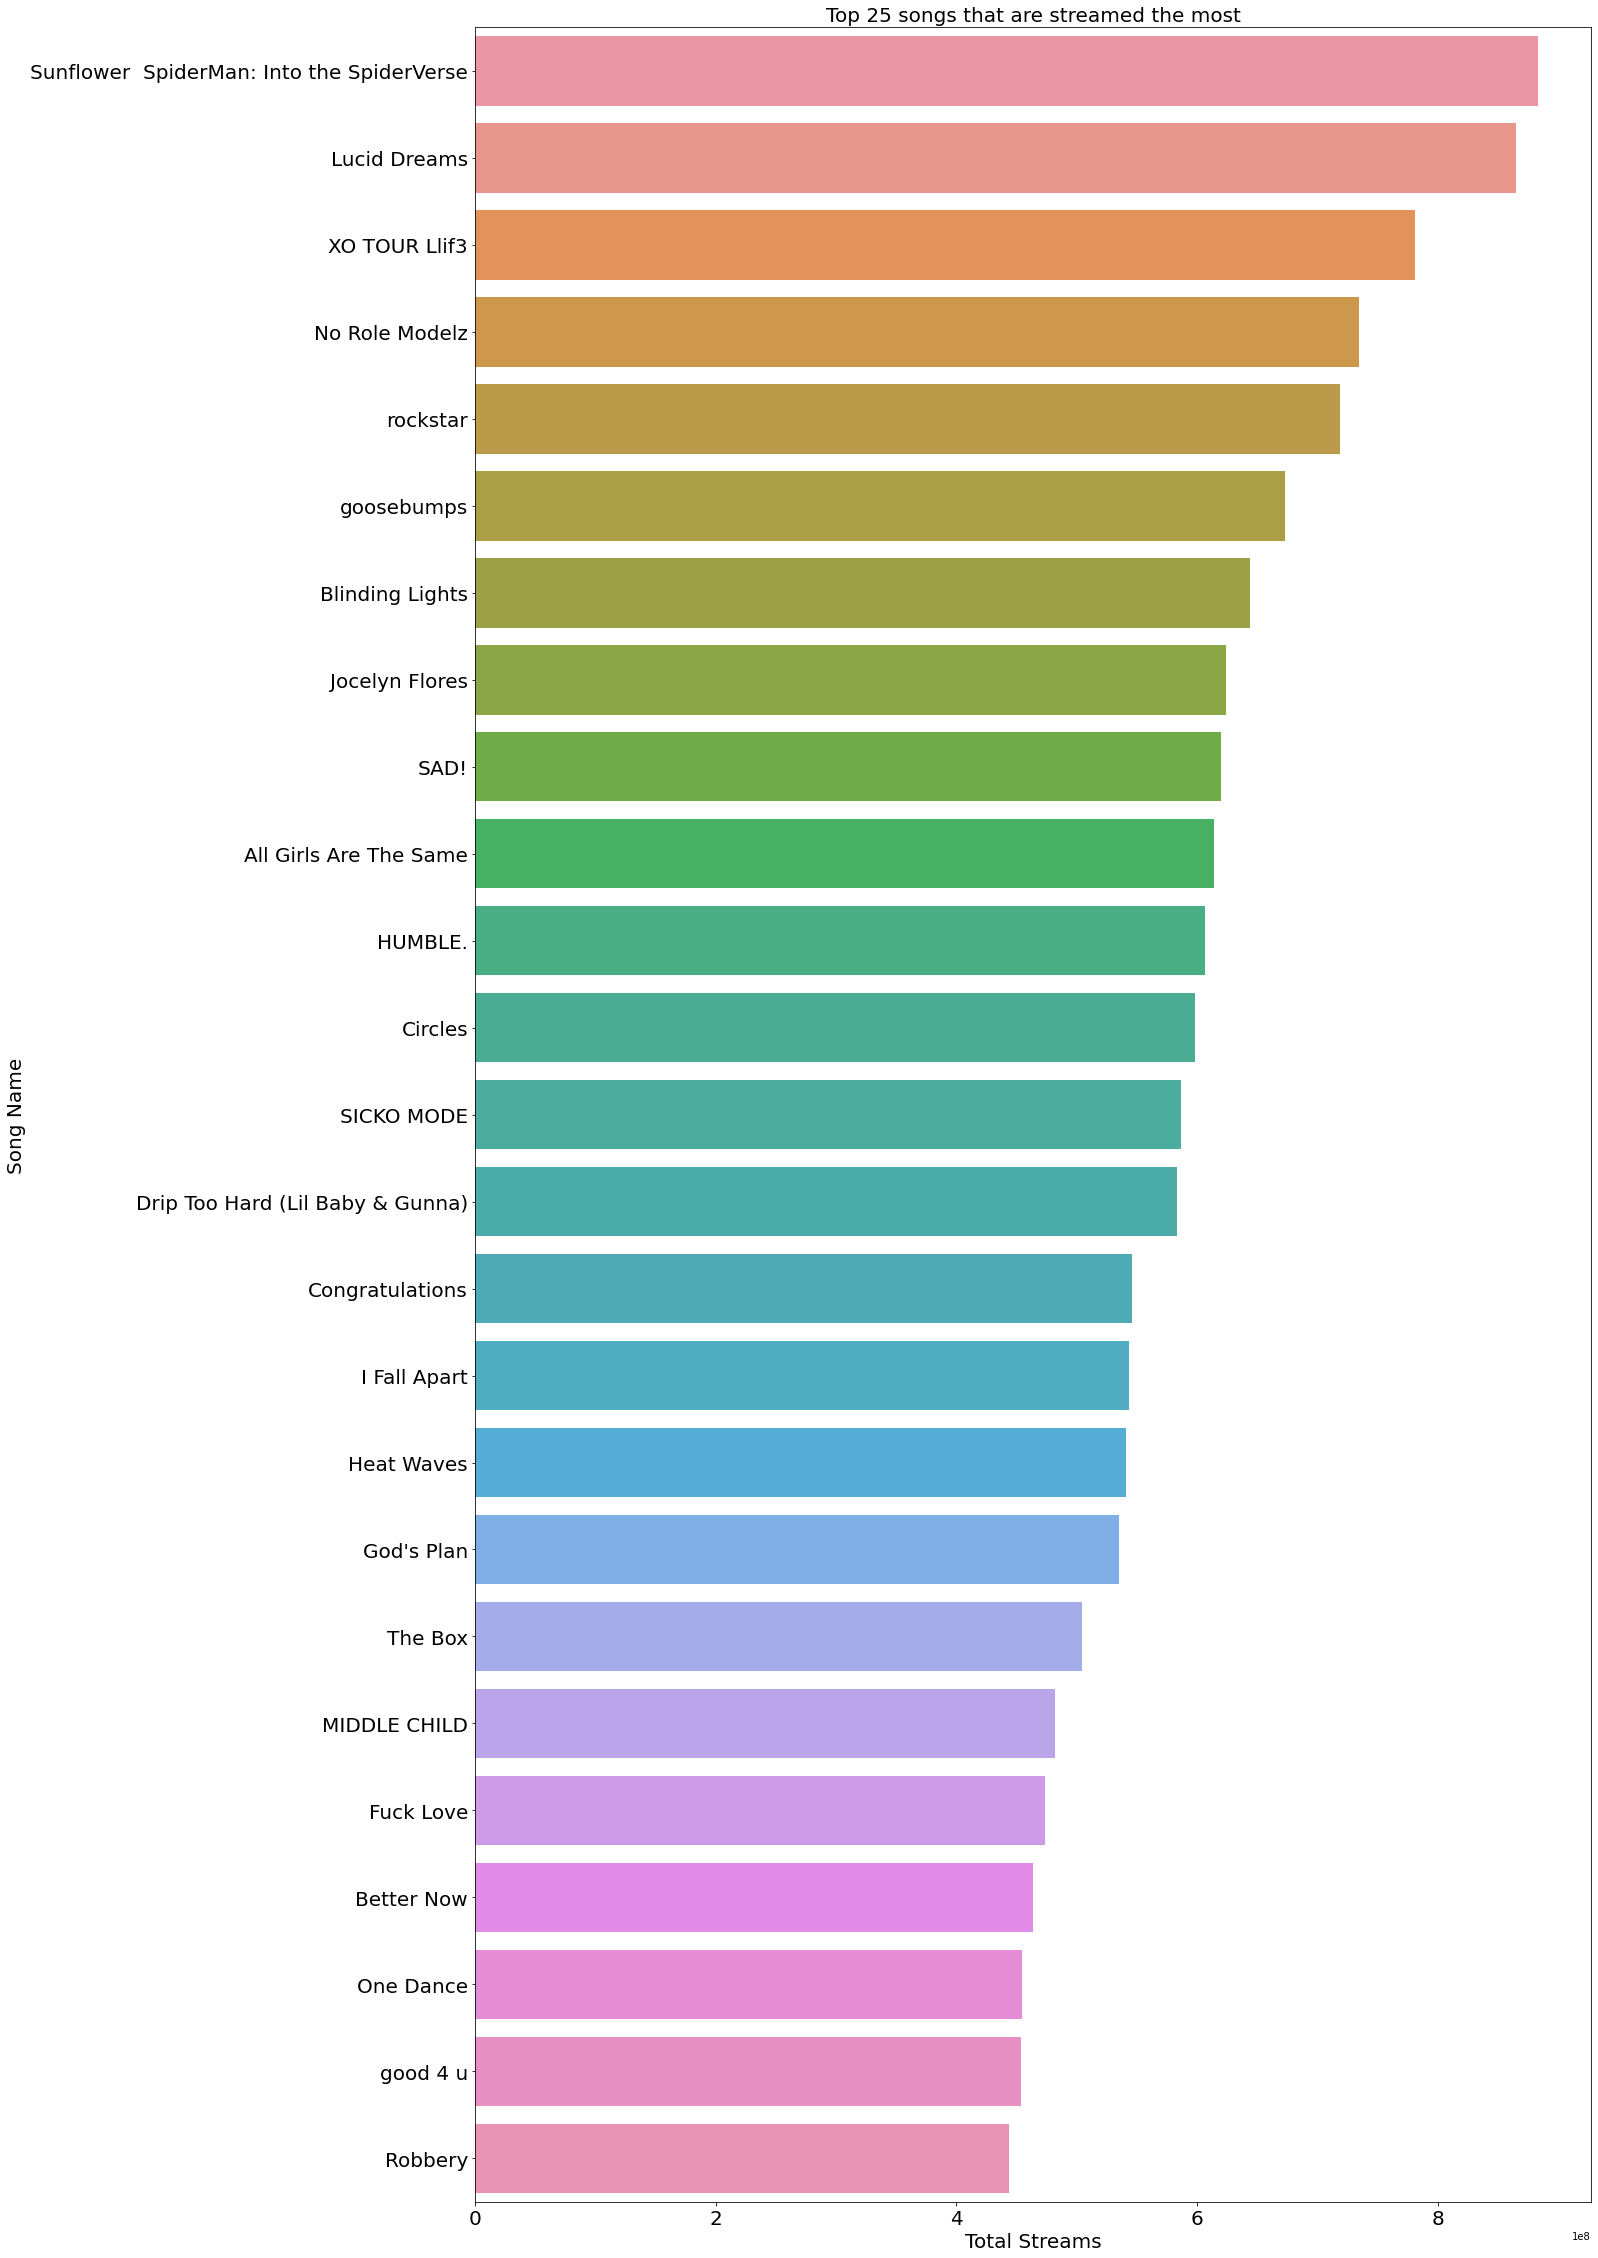

In [18]:
plt.figure(figsize=(20,40))
top_songs = data.sort_values(by='Total Streams', ascending=False).head(25)
top_songs = top_songs[['Song Name', 'Total Streams']]
sns.barplot(y='Song Name', x='Total Streams', data=top_songs)
plt.title("Top 25 songs that are streamed the most", size=20)
plt.ylabel("Song Name", size=20)
plt.xlabel('Total Streams', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [20]:
# There are special characters in Artist Name and this is giving error while plotting in seaborn
# Therefore, removing special characters from names
data["Artist Name"] = data["Artist Name"].str.replace('[^a-zA-Z0-9 \n\.]', '')

In [37]:
data.groupby("Artist Name")["Total Streams"].sum()

Artist Name
100 gecs                 238674
2 Chainz              326838914
21 Savage            1338289449
22 Savage               5691910
220 KID                  279928
                        ...    
quinnie                  236899
salem ilese            18827099
siouxxie sixxsta       13691754
townhall                 943207
uicideboy             173610817
Name: Total Streams, Length: 1612, dtype: int64

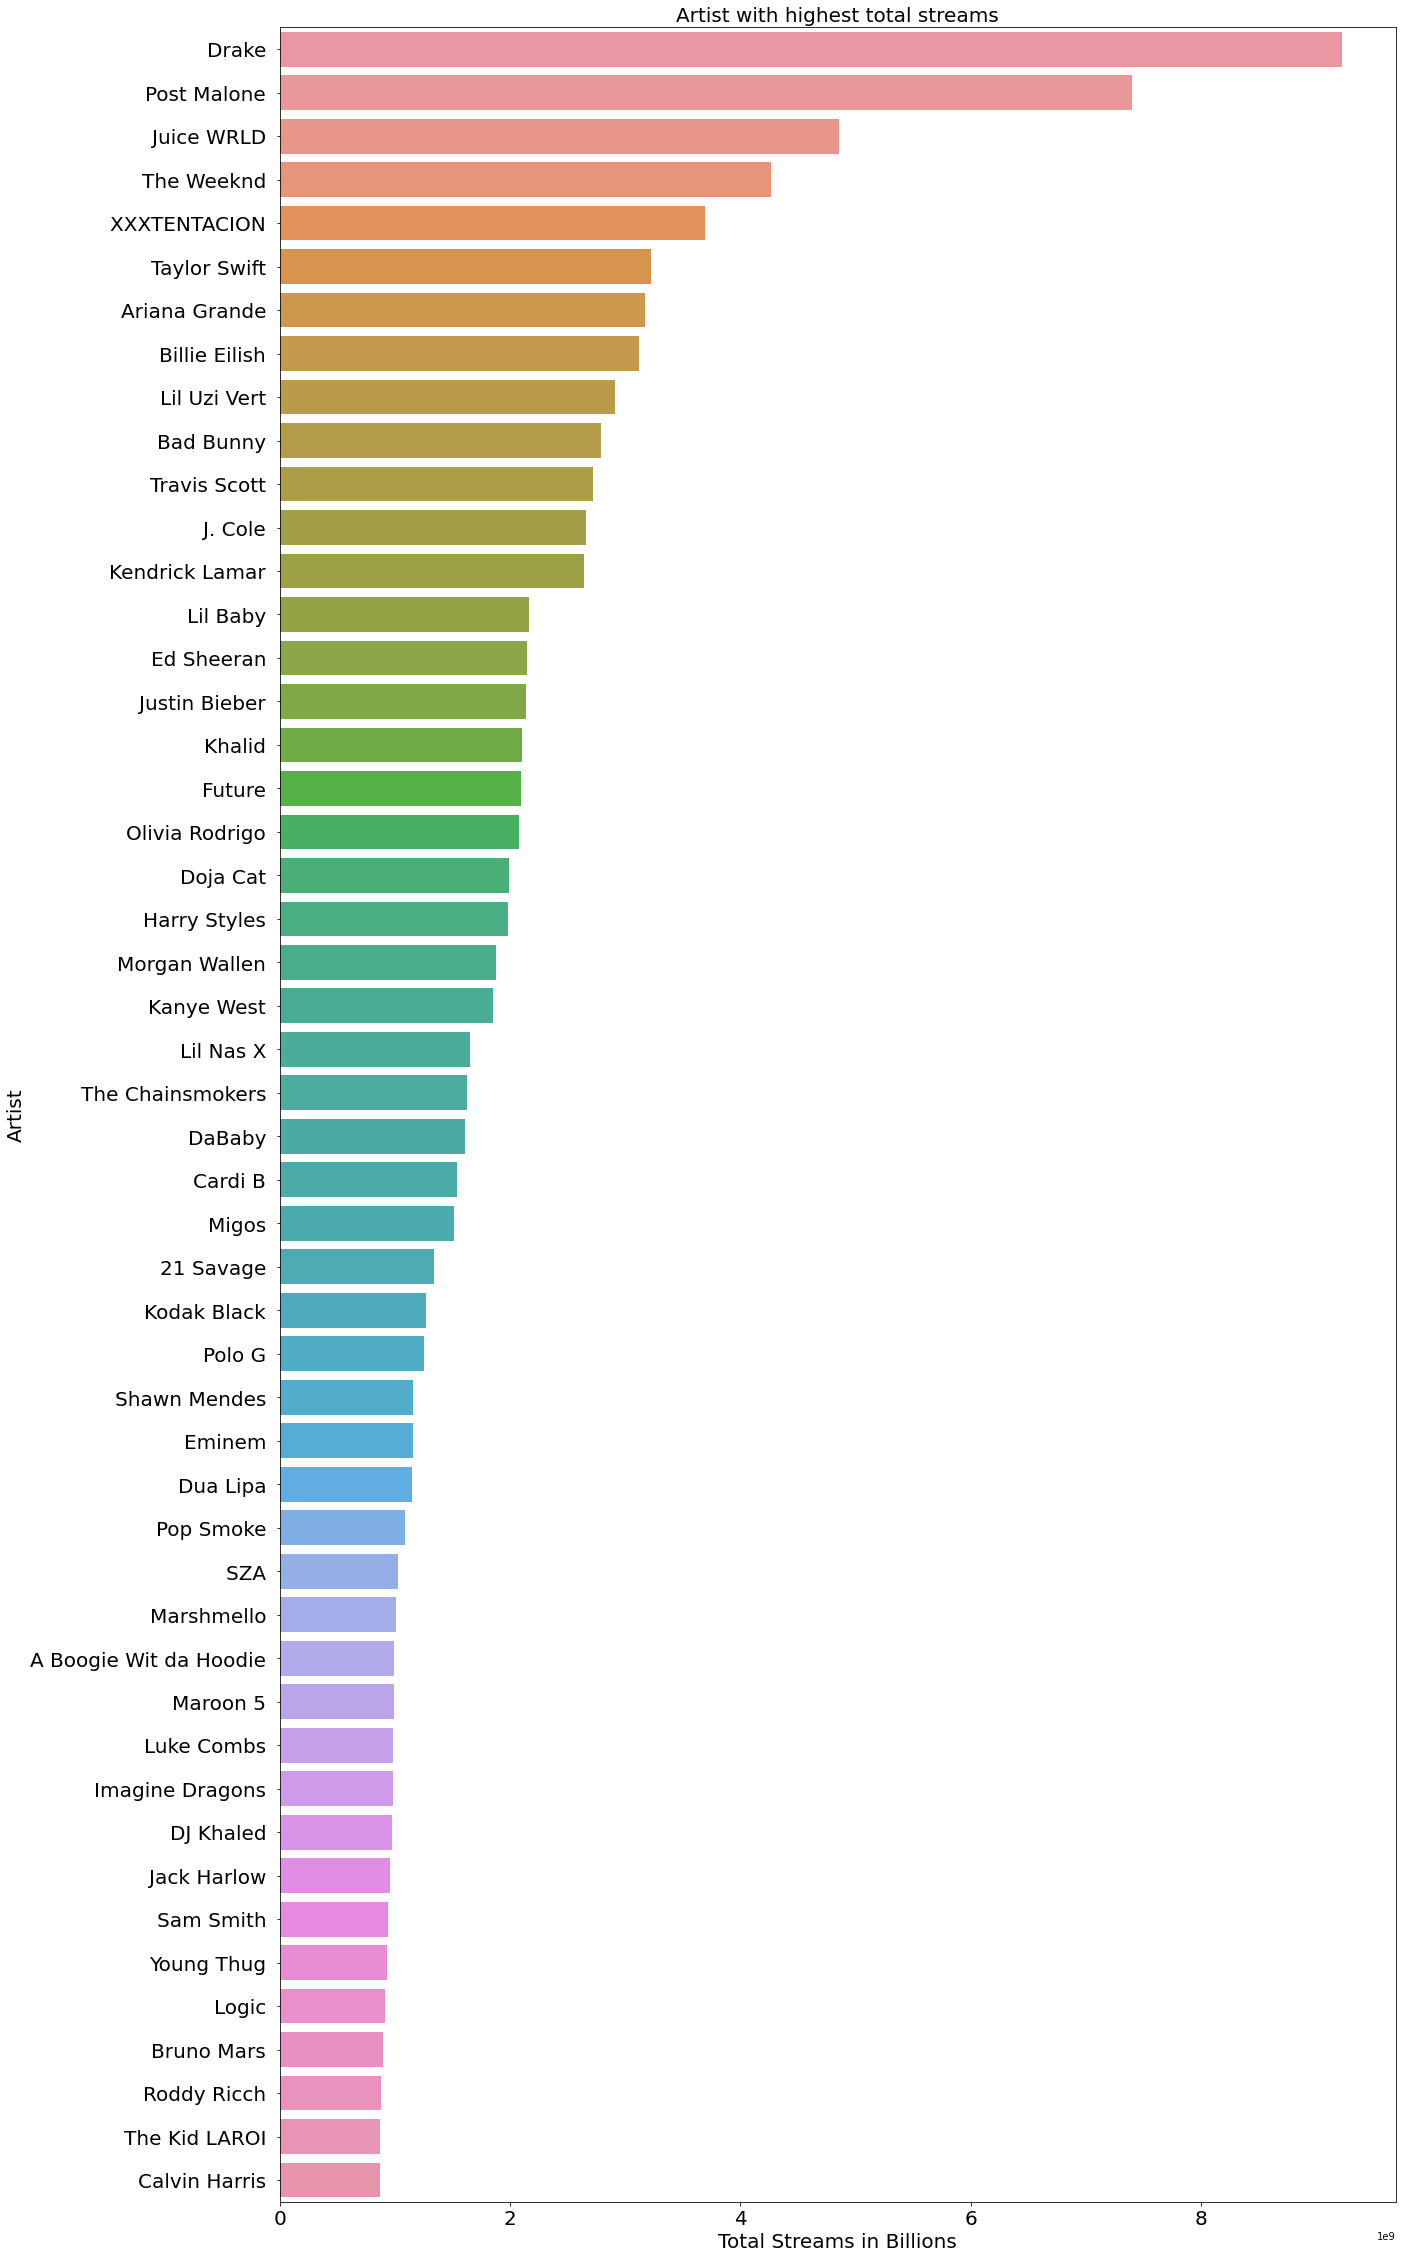

In [38]:
plt.figure(figsize=(20,40))
artist_streams = data.groupby('Artist Name')['Total Streams'].sum().sort_values(ascending=False)
top_artists = artist_streams.nlargest(50)
sns.barplot(y=top_artists.index, x=top_artists.values)
plt.title("Artist with highest total streams", size=20)
plt.ylabel("Artist", size=20)
plt.xlabel("Total Streams in Billions", size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

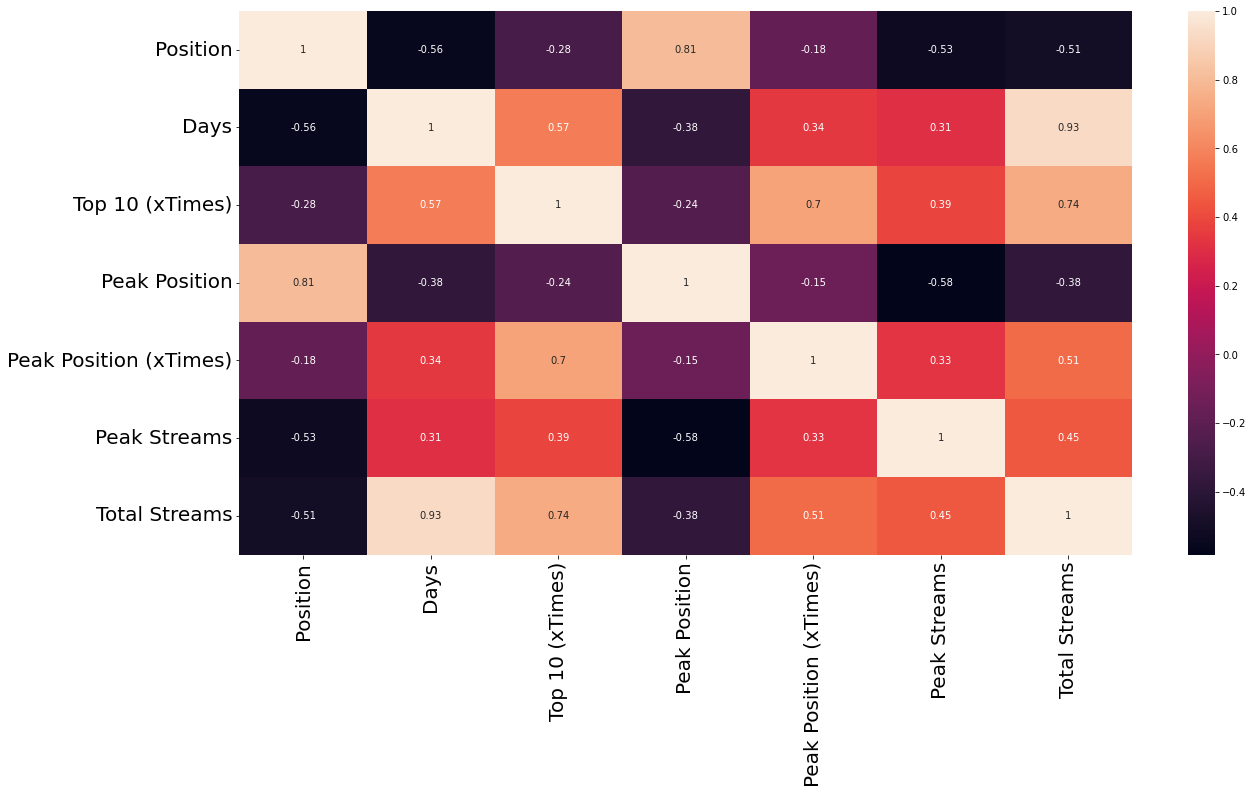

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
plt.show()

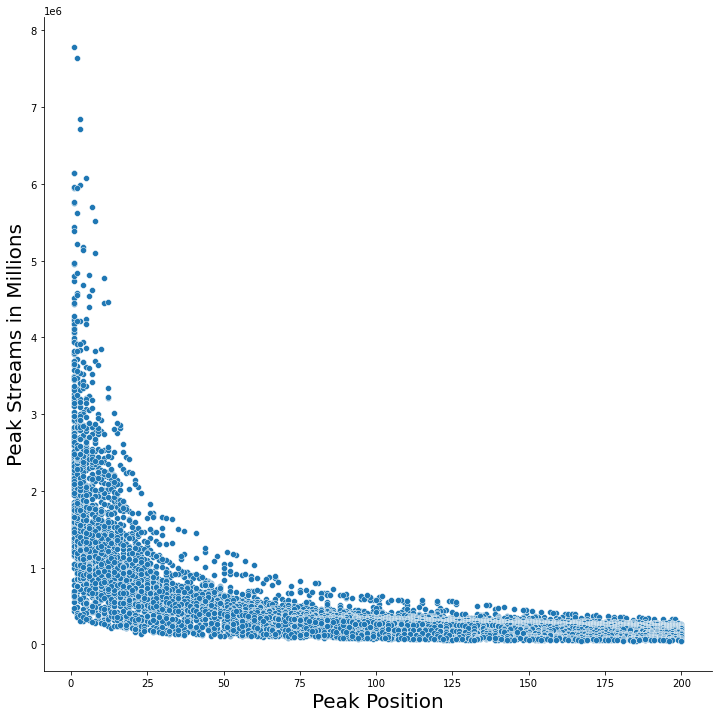

In [41]:
sns.pairplot(data,x_vars=["Peak Position"],y_vars=["Peak Streams"],height=10)
plt.xlabel('Peak Position', size=20)
plt.ylabel('Peak Streams in Millions', size=20)
plt.show()

There is a negative correlation. As the peak position is closer to 1, the number of streams during peak is high. The distribution resembles a pareto distribution. Also known as the Pareto principle or the 80-20 rule, is a probability distribution that describes a situation in which a large portion of the effects come from a small portion of the causes. It is a power-law distribution, which means that the probability of an event occurring is proportional to a power of the event's size.

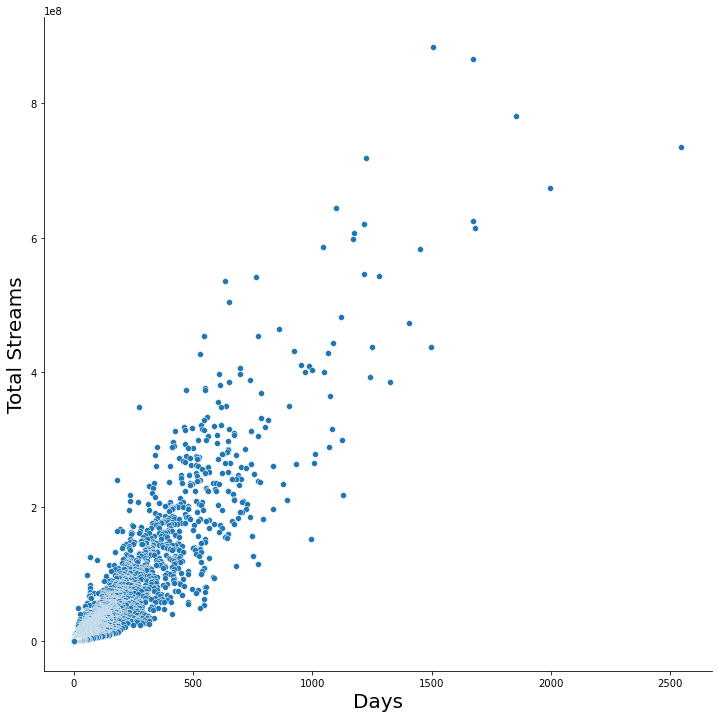

In [42]:
sns.pairplot(data, x_vars=['Days'], y_vars=['Total Streams'], height=10)
plt.xlabel('Days', size=20)
plt.ylabel('Total Streams', size=20)
plt.show()

Days and Total Streams have great positive correlation as shown in the plot

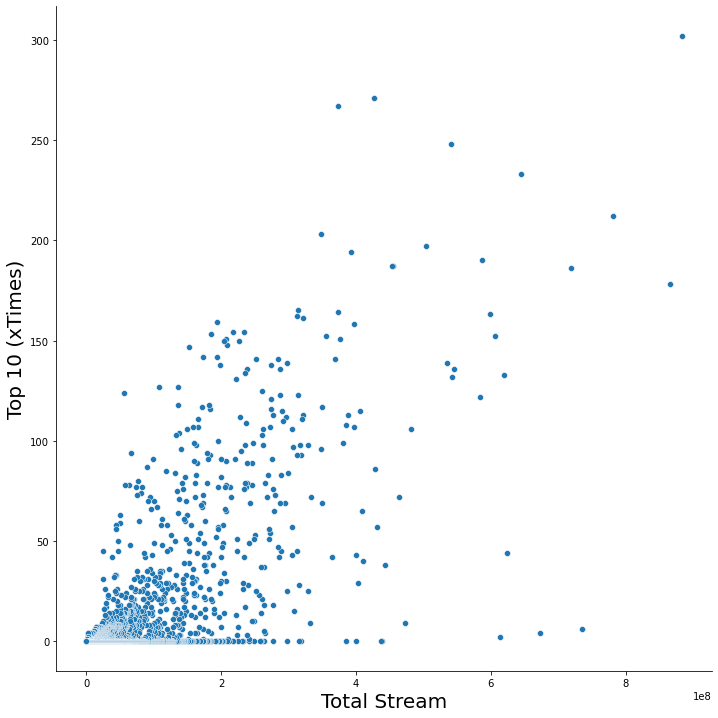

In [43]:
sns.pairplot(data, x_vars=['Total Streams'], y_vars=['Top 10 (xTimes)'], height=10)
plt.xlabel('Total Stream', size=20)
plt.ylabel('Top 10 (xTimes)', size=20)
plt.show()


Total Streams and Top 10 have good positive correaltion. There are few outliers though. If we detect these outlier songs, then the correlation would be higher